In [18]:
import pandas as pd

superstore = pd.read_excel('US_superstore_data.xls')
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [19]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [20]:
superstore_clean = superstore.drop(['Postal Code','Row ID','Region','Customer ID','Product ID'], axis=1)
# deleting unnessecery data

In [21]:
superstore_clean.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [46]:
# Create an interactive line chart to show sales trends over the years
import plotly.express as px

fig = px.line(superstore_clean, x='Order Date', y='Sales', title='Sales Trends Over the Years')
fig.show()

the average sales level has remained at the same level over the years (about 5k)

In [47]:
# Build an interactive map to visualize sales distribution by country.
fig = px.scatter_geo(superstore_clean, locations='Country', locationmode='country names', color='Sales',
                     hover_name='Country', size='Sales', projection='natural earth', title='Sales Distribution by Country')
fig.show()

in this dataset we can look only at USA sales

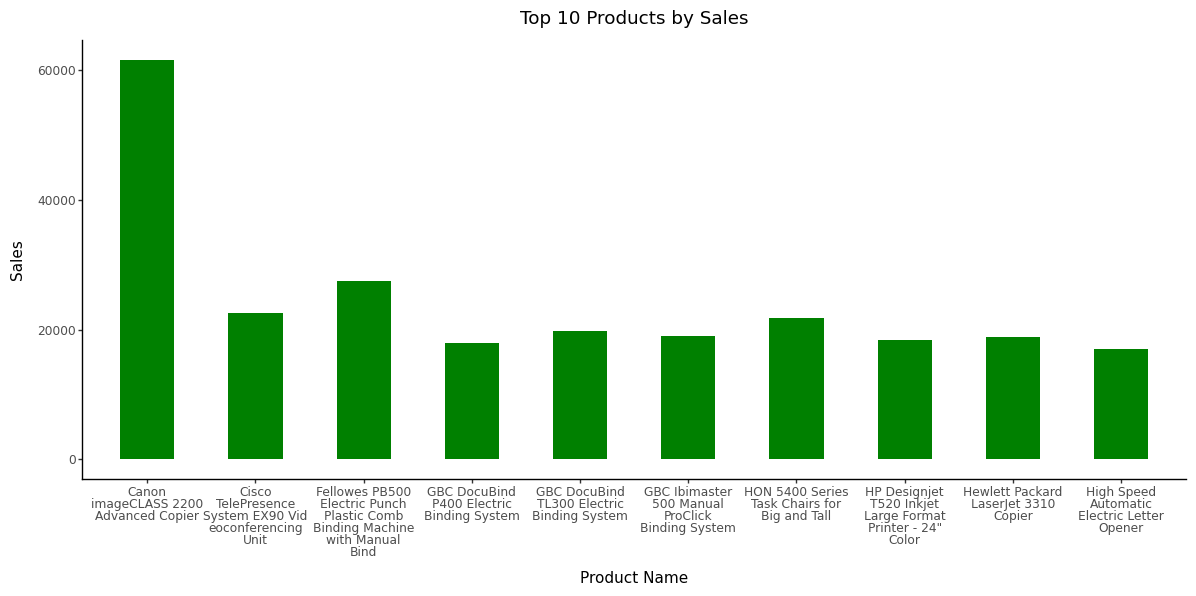

In [61]:
# Use Plotnine to generate a bar chart showing top 10 products by sales.
import textwrap # wrapping names of product for radability
superstore_clean['Product Name'] = superstore_clean['Product Name'].apply(lambda x: '\n'.join(textwrap.wrap(x, width=15)))
top_products = superstore_clean.groupby('Product Name')['Sales'].sum().nlargest(10) # creating top 10
top_products_sorted = top_products.sort_values(ascending=False) # sorting values
fig = (ggplot(top_products_sorted.reset_index(), aes(x='Product Name', y='Sales')) # axis
       + geom_bar(stat='identity', fill='green', width=0.5) # adding color
       + labs(title='Top 10 Products by Sales', x='Product Name', y='Sales') #adding labels
       + theme_classic()
       + theme(figure_size=(12,6))) # making plot wider
fig.draw()

we can see that copiers and binding systems are most popular products

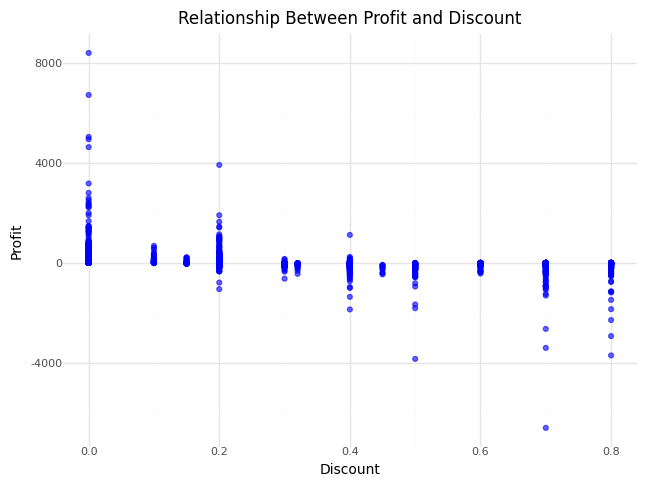

In [51]:
# Create a scatter plot to analyze the relationship between profit and discount.
import plotnine as p9
from plotnine import *

scatter_plot = (
    ggplot(superstore_clean, aes(x='Discount', y='Profit')) +
    geom_point(color='blue', alpha=0.6) +
    labs(title='Relationship Between Profit and Discount',
         x='Discount', # adding titles and labels
         y='Profit') +
    theme_minimal() +
    theme(
        plot_title=element_text(size=12),
        axis_title=element_text(size=10),
        axis_text=element_text(size=8)
    )
)
scatter_plot.draw()

The larger the discount, the less profit the company receives. However, the company loses almost nothing if the discount does not exceed 20%, but gains customer loyalty